In [2]:
#load library packages
library(phyloseq)
library(readr)
library(ggplot2)

In [10]:
#import biom file producted by QIIME 
manure <- import_biom("conv_otu_table_no_singletons_10.biom")
colnames(tax_table(manure)) <- c(k = "Kingdom", p = "Phylum", c = "Class", o = "Order", f = "Family",
                               g = "Genus")

#load mapping files
mapping_file_2 <- read_delim("~/RCode/mapping_file_2.txt", 
                             "\t", escape_double = FALSE,  
                             trim_ws = TRUE)
map = as.data.frame(mapping_file_2) # convert tibble to dataframe
row.names(map) <- map[,1] #make first column as row names for merge_phyloseq matching (very important)

#some renaming process
map$ShelterInfo <- sub("heltere", "hade", map$ShelterInfo)
colnames(map)[colnames(map)=='ShelterInfo'] <- 'Treatment'
map$day <- sub("^", "day", map$Day)

#group sample days to five periods
map$Sample_period[map$Day == 0 ] <- "day0"
map$Sample_period[map$Day >= 2 & map$Day <= 6 ] <- "day2-6"
map$Sample_period[map$Day >= 8 & map$Day <= 15 ] <- "day8-15"
map$Sample_period[map$Day >= 22 & map$Day <= 29 ] <- "day22-29"
map$Sample_period[map$Day >= 43 & map$Day <= 57 ] <- "day43-57"

#merge metadata table to biom table
sampledata = sample_data(map)
manurephy = merge_phyloseq(manure, sampledata)

Warning message:
“Missing column names filled in: 'X1' [1], 'X10' [10]”Parsed with column specification:
cols(
  X1 = col_character(),
  BarcodeSequence = col_character(),
  LinkerPrimerSequence = col_character(),
  Day = col_integer(),
  Type = col_character(),
  Day_Type = col_character(),
  Day_Treat = col_character(),
  ShelterInfo = col_character(),
  Description = col_character(),
  X10 = col_character()
)


Warning message:
“Removed 180 rows containing missing values (geom_errorbar).”

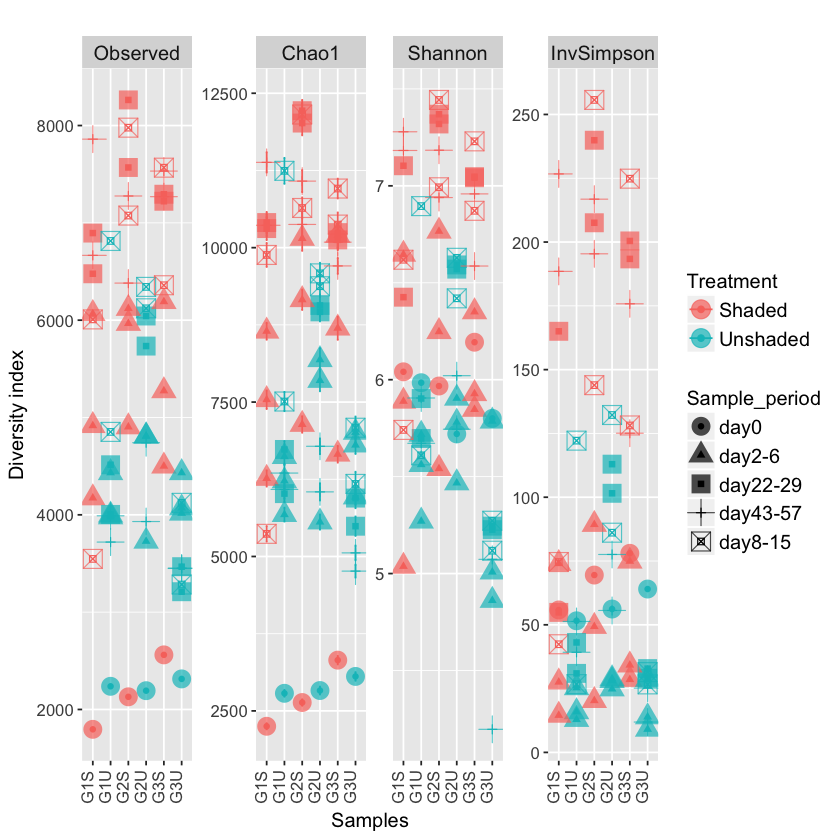

In [11]:
#plot richness with shaded and unshaded samples at different colors
plot_richness(manurephy, x = "Type", color = "Treatment", shape="Sample_period", title="", measures=c("Observed", "Chao1", "Shannon", "InvSimpson")) + 
                geom_point(size = 5, alpha = 0.7) +
                xlab("Samples") + ylab("Diversity index") +
                theme(axis.text.x=element_text(size=10,angle=90, vjust=0.05), 
                      axis.text.y=element_text(size=10),
                      axis.title=element_text(size=12),
                      strip.text=element_text(size=12),
                      legend.title=element_text(size=12),
                      legend.text=element_text(size=12))

Warning message:
“Removed 180 rows containing missing values (geom_errorbar).”

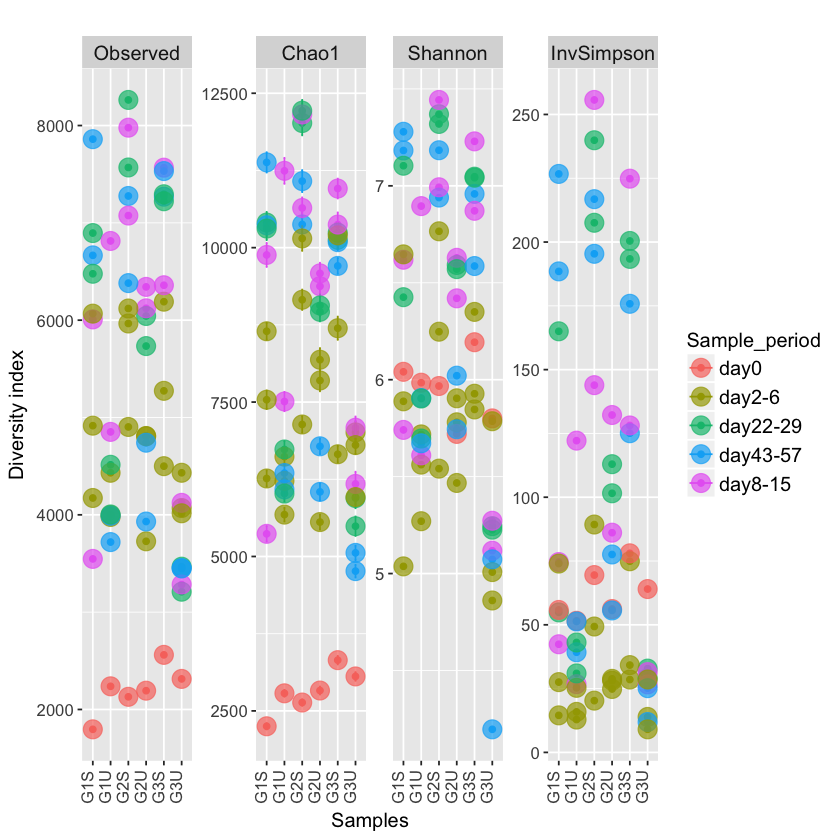

In [12]:
#plot richness with Sample_period at different colors
plot_richness(manurephy,  x = "Type", color = "Sample_period", title="", measures=c("Observed", "Chao1", "Shannon", "InvSimpson")) + 
                      geom_point(size = 5, alpha = 0.7) +
                      xlab("Samples") + ylab("Diversity index") +
                      theme(axis.text.x=element_text(size=10,angle=90, vjust=0.05), 
                            axis.text.y=element_text(size=10),
                            axis.title=element_text(size=12),
                            strip.text=element_text(size=12),
                            legend.title=element_text(size=12),
                            legend.text=element_text(size=12))

Warning message:
“attributes are not identical across measure variables; they will be dropped”

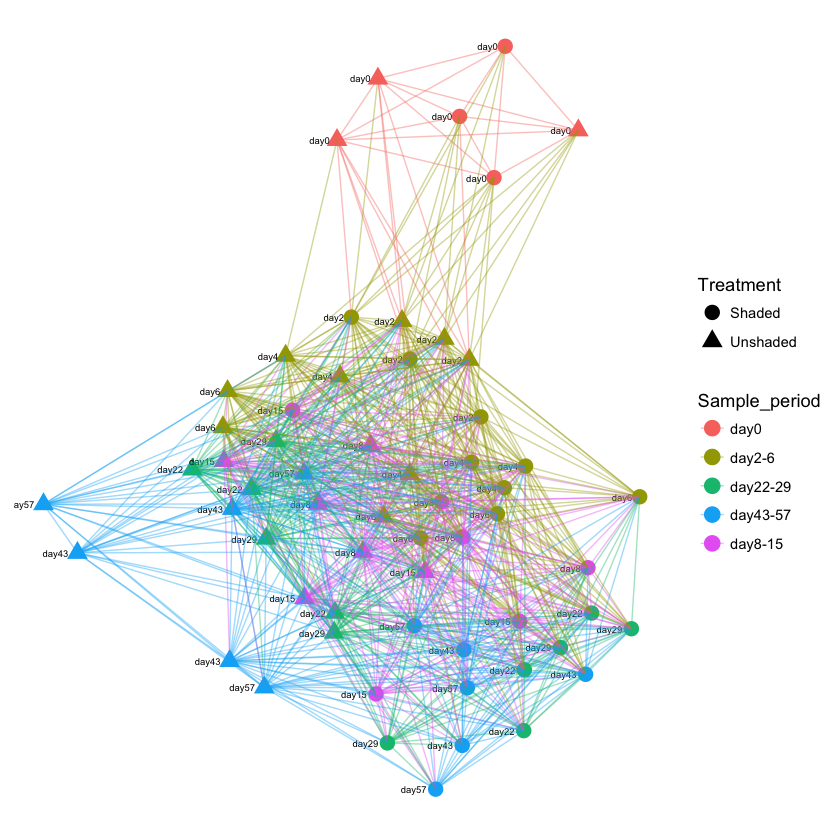

In [13]:
#make network and plot network
ig <- make_network(manurephy, max.dist=0.9)
plot_network(ig, manurephy, color = "Sample_period", shape="Treatment", line_weight=0.4, label="day") 